In [6]:
import keras
print(keras.__version__)
%load_ext autoreload
%autoreload 1

2.2.5
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# third part imports
import os
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)
from IPython.display import SVG
from keras.utils import model_to_dot, plot_model

In [8]:
# custom imports
%aimport database_utils 
%aimport image_utils
%aimport models 

In [9]:
CONNECTION_STRING = 'connect_local.txt'
EPOCHS = 50
BATCH_SIZE = 500
NUM_TEST_SAMPLES = 500
NUM_CLASSES = 11

In [10]:
# preprocess
curr = database_utils.makeDatabaseConnection(CONNECTION_STRING)
image_urls, labels = database_utils.fetchData(curr)
trainX, testX, trainy, testy = database_utils.split_train_and_test(image_urls, labels, NUM_TEST_SAMPLES)
train_X_database = image_utils.makeImageArrayFromDataBase(trainX)
train_y_database = image_utils.convertToCategorical(trainy, NUM_CLASSES)

In [11]:
# create model 
model = models.makeModelArchitectureOne()
models.fitModel(model, train_X_database, train_y_database, EPOCHS, NUM_TEST_SAMPLES)

Epoch 1/50
10066/10066 [==============================] - 23s 2ms/step - loss: 2.4972 - acc: 0.3607
Epoch 2/50
10066/10066 [==============================] - 22s 2ms/step - loss: 1.4515 - acc: 0.5960
Epoch 3/50
10066/10066 [==============================] - 24s 2ms/step - loss: 1.3021 - acc: 0.6130
Epoch 4/50
10066/10066 [==============================] - 31s 3ms/step - loss: 1.2333 - acc: 0.6230
Epoch 5/50
10066/10066 [==============================] - 22s 2ms/step - loss: 1.2087 - acc: 0.6229
Epoch 6/50
10066/10066 [==============================] - 24s 2ms/step - loss: 1.1803 - acc: 0.6276
Epoch 7/50
10066/10066 [==============================] - 23s 2ms/step - loss: 1.1521 - acc: 0.6326
Epoch 8/50
10066/10066 [==============================] - 23s 2ms/step - loss: 1.1421 - acc: 0.6347
Epoch 9/50
10066/10066 [==============================] - 21s 2ms/step - loss: 1.1432 - acc: 0.6358
Epoch 10/50
10066/10066 [==============================] - 22s 2ms/step - loss: 1.0980 - acc: 0.6376

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 50)        40050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 80)          100080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 80)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 130)        

In [20]:
test_X_database = image_utils.makeImageArrayFromDataBase(testX)
misclassified = database_utils.makePredictionsAndComputeAccuracyDatabase(model, test_X_database, testy)

0.684


In [21]:
# writeMisclassifiedSamplesToFile("misclassified.csv", misclassified)

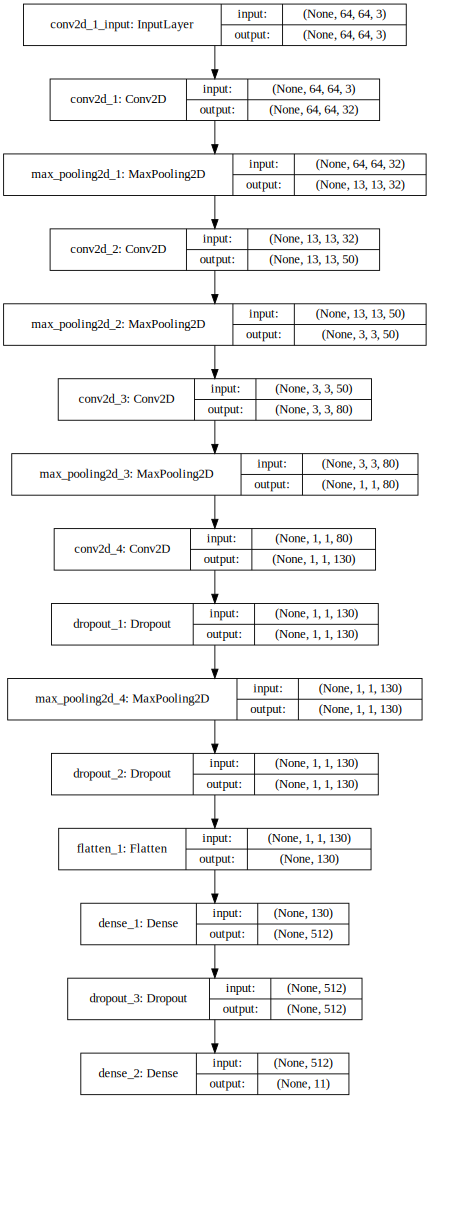

In [22]:
m = model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=65)
res = m.create(prog='dot', format='svg')
SVG(res)

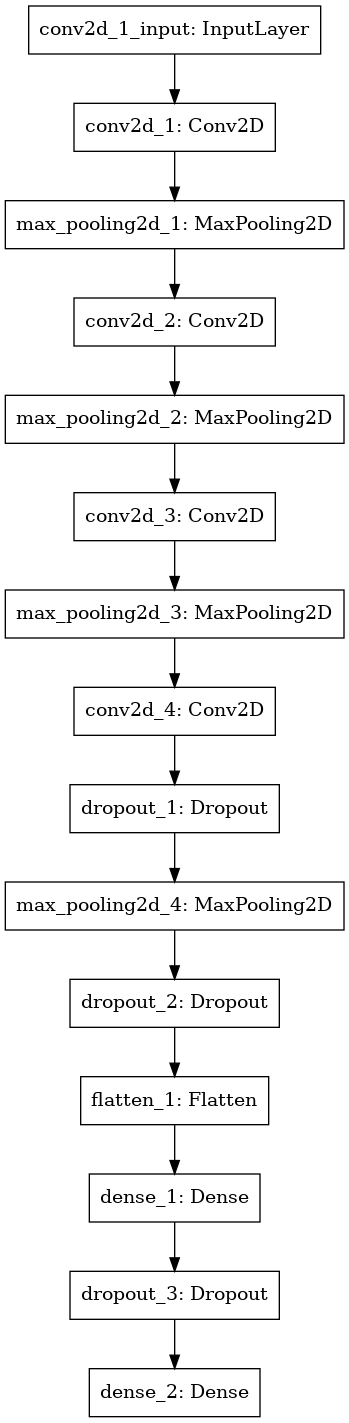

In [23]:
plot_model(model, to_file='model.png')

In [24]:
# optional depending on results
model.save('cnn_50_80_130_one.h5')

In [25]:
# can reload if needed
prev_model = load_model('cnn_50_80_130.h5')
prev_model.summary()

NameError: name 'load_model' is not defined